Welcome to the CopyDataFromAGOL script

This will copy the feature layers in Esri2 comment layer folder `TPCM Project Comment Layers Esri2` to the FGDB folder `TPCM Project Esri 2 Comment Layers FGDB` in ArcGIS Online. 

Make sure the FGDB folder is empty before beginning. 

Run through each script. 

This will download the FGDBs as zip files and extract them to a folder `c:/tmp/TPCM/TPCMdatabases`

If you have run the tool before make sure to delete or archive all content here `c:/tmp/TPCM/` before running the tool. If this folder does not exist or this is your firs time running this tool that folder will be created.

In [3]:
#Import moduels

from arcgis.gis import GIS
from getpass import getpass
from shutil import copytree
from zipfile import ZipFile

import os

In [4]:
#Log in to TPCMAdmin using password

print("Please provide a password ...")
password = getpass()
gis = GIS('http://usfs.maps.arcgis.com', 'TPCMAdmin', password)
#gis = gis.GIS('http://usfs.maps.arcgis.com', 'zneumann_usfs', password)
print("Successfully logged on ...")

Please provide a password ...
········
Successfully logged on ...


<User username:TPCMAdmin>
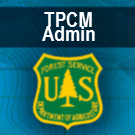

In [5]:
TPCMAdmin = gis.users.me
TPCMAdmin

In [6]:
# -----------------------------------------------------------------------------
# list_items_in_folder
# -----------------------------------------------------------------------------
def list_items_in_folder(user, folder_name):
    ItemId_List = []
    for folder in user.items(folder=folder_name):
        ItemId_List.append(folder.id)
    return ItemId_List

# -----------------------------------------------------------------------------
# export_to_fgdb
# -----------------------------------------------------------------------------
def export_to_fgdb(ItemId, folder_name):
    '''Takes the ItemID of a Feature Layer in ArcGIS Online and the name of an already existing folder 
    and converts the Feature Layer to a FGDB and places it in the chosen folder'''
    service = gis.content.get(ItemId)
    service_name = service.title.replace(" ", "_")
    fgdb_name = service_name + "_FGDB"
    export = service.export(fgdb_name, 'File Geodatabase', parameters=None, wait='True')
    fgdb = gis.content.get(export['exportItemId'])
    fgdb.move(folder_name)

    
# -----------------------------------------------------------------------------
# download_and_unzip
# -----------------------------------------------------------------------------
def download_and_unzip(Path, ItemId):
    Item = gis.content.get(ItemId)
    Item.download(save_path=Path)
    zfPath = Path + Item.title.replace('_','').replace('-','') + '.zip'
    zf = ZipFile(zfPath)
    zf.extractall(path=Path + Item.title)
    
    
# -----------------------------------------------------------------------------
# _isExistingFolder
# -----------------------------------------------------------------------------
def _isExistingFolder(folderName):

    #gis = GIS("pro")
    allfolders = gis.users.me.folders

    ret = False

    for folder in allfolders:
        if (folder['title'].lower() == folderName.lower()):
            ret = True
            break

    return ret


# -----------------------------------------------------------------------------
# _createFolder
# -----------------------------------------------------------------------------
def _createFolder(path):
    MYDIR = (path)
    CHECK_FOLDER = os.path.isdir(MYDIR)

    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

In [7]:
# -----------------------------------------------------------------------------
# Set variables
# -----------------------------------------------------------------------------

cfl_folder = 'TPCM Project Comment Layers Esri2'
Esri2_TPCMdata = list_items_in_folder(TPCMAdmin, cfl_folder)
output_folder = 'TPCM Project Esri 2 Comment Layers FGDB'

In [8]:
# -----------------------------------------------------------------------------
# Convert comment feature layers to FGDB and put int output_folder
# -----------------------------------------------------------------------------

if _isExistingFolder(output_folder):
    print("Converting comment feature layers to FGDB".format(output_folder))
    for ItemId in Esri2_TPCMdata:
        export_to_fgdb(ItemId, output_folder)
else:
    print("Output folder {} does not exist... please create folder {} and run again".format(output_folder, output_folder))

Output folder {} exists, converting comment feature layers to FGDB


In [9]:
# -----------------------------------------------------------------------------
# Download and unzips FGDBs created in previous step to C: > tmp > TPCM > TPCMdata
# -----------------------------------------------------------------------------

path = os.path.join("c:\\","tmp","TPCM", "TPCMdata\\")

_createFolder(path)

print("Downloading fgdb to folder {}".format(path))

for ItemId in list_items_in_folder(TPCMAdmin, output_folder):
    download_and_unzip(path, ItemId)

created folder :  c:\tmp\TPCM\TPCMdata\


In [10]:
# -----------------------------------------------------------------------------
# Build a dictionary of directories and rename cryptic gdb names to match project title 
# placing the new folder in C: > tmp > TPCM > TPCMdatabases
# -----------------------------------------------------------------------------

directories = []
for root, dirs, files in os.walk(path):
    for dir in dirs:
        if dir[-4:] != '.gdb':
            directories.append(dir)
            
# for directory in directories:
#     print("directory: {}".format(directory))
#     for root, dirs, files in os.walk(os.path.join(path,directory)):
#         print("root: {}".format(root))
#         print("dir: {}".format(dir))
#         print("\n")

path_src = path
path_dst = os.path.join("c:/","tmp","TPCM", "TPCMdatabases")

_createFolder(path_dst)

gdb_dic = {}
gdb_name = []

for directory in directories:
    for root, dirs, files in os.walk(os.path.join(path_src,directory)):
        if root[-4:] == '.gdb':
            gdb_dic["{}.gdb".format(directory)] = root
            
for directory in directories:
    name = "{}.gdb".format(directory)
    src = gdb_dic[name]
    dst = os.path.join(path_dst,name)
    print(src)
    print(dst)
    print('\n')
    try:
        copytree(src, dst, symlinks=True)
    except:
        pass

created folder :  c:/tmp\TPCM\TPCMdatabases
c:\tmp\TPCM\TPCMdata\R02_GMUG_Blue_Lakes_Trail_Evaluation_Comments_FGDB\8e6caf084dbf46dd8a77741a38f82f46.gdb
c:/tmp\TPCM\TPCMdatabases\R02_GMUG_Blue_Lakes_Trail_Evaluation_Comments_FGDB.gdb


c:\tmp\TPCM\TPCMdata\R02_GMUG_ForestMgmt_Other_Comments_FGDB\26e83f864b5f47e9a4cdfcf9bed69809.gdb
c:/tmp\TPCM\TPCMdatabases\R02_GMUG_ForestMgmt_Other_Comments_FGDB.gdb


c:\tmp\TPCM\TPCMdata\R04_BTF_Wild_and_Scenic_River_Inventory_Inventory_Comments_FGDB\eb99bff340724478929afd9af3d7ef38.gdb
c:/tmp\TPCM\TPCMdatabases\R04_BTF_Wild_and_Scenic_River_Inventory_Inventory_Comments_FGDB.gdb


c:\tmp\TPCM\TPCMdata\R05_SNF_Six_Rivers_National_Forest_Fuels_and_Fire_Management_Scoping_Comments_FGDB\22b64b5064df422fb2cc9751e31208f7.gdb
c:/tmp\TPCM\TPCMdatabases\R05_SNF_Six_Rivers_National_Forest_Fuels_and_Fire_Management_Scoping_Comments_FGDB.gdb


c:\tmp\TPCM\TPCMdata\R05_SRF_Six_Rivers_Fules_and_Fire_Management_Scoping_Comments_FGDB\49e98af9bf014d448852f0b5df3cb303

In [11]:
# -----------------------------------------------------------------------------
# Clean Up items in FGDB folder on AGOL
# -----------------------------------------------------------------------------

fgdb_items = list_items_in_folder(TPCMAdmin, output_folder)
for item in fgdb_items:
    item_to_delete = gis.content.get(item)
    item_to_delete.delete()

Make sure to delete items in the tmp folder before running this script again.